In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, accuracy_score

In [50]:
iris = load_iris()
x = iris['data']
x = preprocessing.normalize(x)
y = iris['target']
train_x, test_x, train_y, test_y = train_test_split(x, y)

In [51]:
est = KMeans(n_clusters=3)
est.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
import itertools
for order in list(itertools.permutations([0, 1, 2])):
    preds = np.choose(est.labels_, order).astype(np.int64)
    print(accuracy_score(preds, train_y))

0.0
0.24107142857142858
0.4017857142857143
0.03571428571428571
0.9642857142857143
0.35714285714285715


In [53]:
preds = np.choose(est.labels_, [2, 1, 0]).astype(np.int64)

In [54]:
accuracy_score(preds, train_y)

0.35714285714285715

## PSO Algorithm

In [74]:
def dist_func(z, x):
    return np.linalg.norm(z-x)

In [110]:
def initialize(data, nr_of_clusters):
  pop_size = 100

  a1 = a2 = 1.49618
  w = 0.7298

  # Initialize particles
  particles = []
  for n in range(pop_size):
      indexes = np.arange(data.shape[0])
      chosen_indexes = np.random.choice(indexes, nr_of_clusters, replace=False)
      particles.append(data[chosen_indexes])

  particles = np.array(particles)   
  local_best_particles = particles.copy()
  local_best_fitnesses = np.full(pop_size, np.inf)

  velocities = np.random.normal(0, 0.2, (pop_size, nr_of_clusters, data.shape[-1]))
  return particles, local_best_particles, local_best_fitnesses, velocities

In [76]:
def update_v(v, w, x, ind_opt, glob_opt):
    return w*v + a1*r1*(ind_opt - x) + a2*r2*(glob_opt - x)

def update_pos(x, v, lbest, gbest):
    return [x[i] + update_v(v[i], w, x[i], lbest[i], gbest[i]) 
            for i in range(len(x))]

def calc_fitness():
  

In [130]:
def run_pso(data, nr_of_clusters):
  maxiter = 200
  global_best_fitness = np.inf
  particles, local_best_particles, local_best_fitnesses, velocities = initialize(data, nr_of_clusters)

  for i in range(maxiter):
      
      print('Progress: {}/{}'.format(i+1,maxiter))
      
      fitnesses = []
      for j, particle in enumerate(particles):
          clustering = []
          distances = np.zeros(nr_of_clusters)
          fitness = 0
          for z in data:
              # Calculate distance of data point z to each cluter centroid
              dists = [dist_func(z, centroid) for centroid in particle]
              # Assign to cluster
              cluster = dists.index(min(dists))
              clustering.append(cluster)
              # Summing distance of each datapoint assigned to cluster
              distances[cluster]+=min(dists)
          # calculate fitness for this particle
          for cluster in range(nr_of_clusters):
              fitness += (distances[cluster] / clustering.count(cluster))/nr_of_clusters
          fitnesses.append(fitness)
          
          # Update local best
          if fitness < local_best_fitnesses[j]:
              local_best_particles[j] = particle
              local_best_fitnesses[j] = fitness
      
      # Update global best
      _new_best_fitness = np.min(fitnesses)
      if _new_best_fitness < global_best_fitness:
          global_best_fitness = _new_best_fitness
          global_best = particles[np.argmin(fitnesses)]
      # print(fitnesses[0].shape)
      # print(_new_best_fitness.shape)
      
      # Update step
      r1 = np.random.uniform()
      r2 = np.random.uniform()
      
      for pidx, particle in enumerate(particles):
          for cidx, centroid in enumerate(particle):
              centroid = update_pos(
                  centroid, 
                  velocities[pidx,cidx], 
                  local_best_particles[pidx][cidx], 
                  global_best[cidx])
              
      print(global_best_fitness)            
  return global_best, global_best_fitness

In [78]:
def get_labels(particle, x):
    labels = []
    for z in x:
        dists = [dist_func(z, centroid) for centroid in particle]
        labels.append(np.argmin(dists))
    return labels

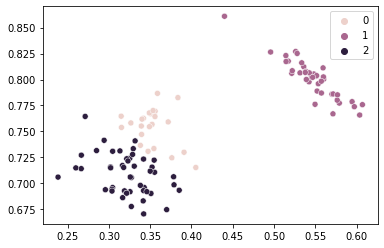

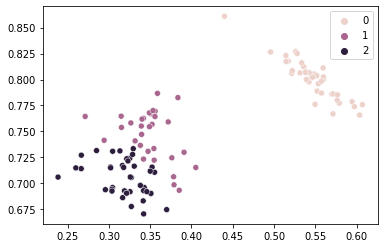

In [79]:
import seaborn as sb

sb.scatterplot(x=train_x[:,1], y=train_x[:,0], hue=pred_labels)
plt.show()
sb.scatterplot(x=train_x[:,1], y=train_x[:,0], hue=train_y)
plt.show()

In [86]:
import itertools
def calc_accuracy(pred_labels, test_labels):
  accuracy = 0
  for order in list(itertools.permutations([0, 1, 2])):
    preds = np.choose(test_pred_labels, order).astype(np.int64)
    new_accuracy = accuracy_score(preds, test_y)
    if new_accuracy > accuracy:
      accuracy = new_accuracy
  return accuracy

In [87]:
import itertools

for run in range(10):
  global_best, quantization_error = run_pso(train_x, 4)
  pred_labels = get_labels(global_best, train_x)
  test_pred_labels =  get_labels(global_best, test_x)
  accuracy = calc_accuracy(test_pred_labels, test_y)
  print(accuracy)

0.9473684210526315
0.9736842105263158
0.8421052631578947
0.9473684210526315
0.9736842105263158
0.9736842105263158
0.9473684210526315
0.9736842105263158
0.9736842105263158


KeyboardInterrupt: ignored

In [108]:
def generate_problem_data():
  x = np.random.uniform(-1, 1, size=(400, 2))
  y = [1 if item[0] >= 0.7 or (item[0] <= 0.3 and item[1] >= -0.2 - item[0]) else 0 for item in x]
  return x, y




In [134]:
x, y = generate_problem_data()
train_x, test_x, train_y, test_y = train_test_split(x, y)



global_best, quantization_error = run_pso(train_x, 2)
pred_labels = get_labels(global_best, train_x)
test_pred_labels =  get_labels(global_best, test_x)
accuracy = calc_accuracy(test_pred_labels, test_y)
print(accuracy)
print(quantization_error)

Progress: 1/200
0.5901623061525543
Progress: 2/200
0.5901623061525543
Progress: 3/200
0.5901623061525543
Progress: 4/200
0.5901623061525543
Progress: 5/200
0.5901623061525543
Progress: 6/200
0.5901623061525543
Progress: 7/200
0.5901623061525543
Progress: 8/200
0.5901623061525543
Progress: 9/200


KeyboardInterrupt: ignored

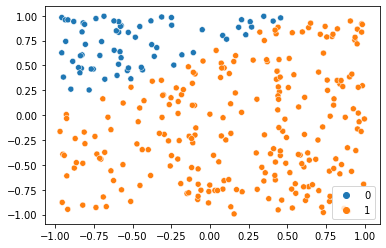

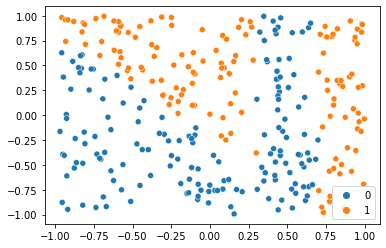

In [132]:
sb.scatterplot(x=train_x[:,0], y=train_x[:,1], hue=pred_labels)
plt.show()
sb.scatterplot(x=train_x[:,0], y=train_x[:,1], hue=train_y)
plt.show()